# COGS 108 - Data Checkpoint

# Names

- Jungsoo Lee
- Lu Zhang
- Mengyuan Zhang

<a id='research_question'></a>
# Research Question

Is there a relationship between the drinking age population, alcohol store density, number of dui providers and the amount of alcohol-related car accidents happened in California?

# Setup

In [1]:
## YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

In [2]:
population_df = pd.read_csv('data/acs2019_5yr_B01001_05000US06049.csv')

population_df.drop(index=1,columns=['Sex by Age','Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
age_column = population_df['B01001']
population_df.dropna(axis=1, inplace=True)
population_df = pd.concat([age_column, population_df], axis=1)
population_df.columns = population_df.iloc[0]
population_df.drop(0, inplace=True)

population_df.reset_index(drop=True)

,NaN,"Alameda County, CA","Alpine County, CA","Amador County, CA","Butte County, CA","Calaveras County, CA","Colusa County, CA","Contra Costa County, CA","Del Norte County, CA","El Dorado County, CA",...,"Sonoma County, CA","Stanislaus County, CA","Sutter County, CA","Tehama County, CA","Trinity County, CA","Tulare County, CA","Tuolumne County, CA","Ventura County, CA","Yolo County, CA","Yuba County, CA"
0,Total:,1656754,1039,38429,225817,45514,21454,1142251,27495,188563,...,499772,543194,96109,63912,12700,461898,54045,847263,217352,76360
1,Male:,814515,554,20640,111735,22663,10994,558502,14745,93922,...,244045,268871,47866,31773,6535,230966,28112,419111,105438,38950
2,Under 5 years,49611,22,796,6395,920,742,33495,884,4431,...,12771,19998,3372,1938,334,19369,1219,25795,6163,3097
3,5 to 9 years,49375,21,730,6941,1253,919,36175,787,5264,...,14417,19923,3668,2209,278,21062,1451,26436,6495,3123
4,10 to 14 years,48777,53,849,5985,977,817,39793,978,5988,...,14430,22568,3725,2351,305,20810,1146,29918,6586,3139
5,15 to 17 years,28149,9,570,4080,825,521,23934,409,3773,...,8967,12746,2185,1241,239,11971,749,17629,4059,1692
6,18 and 19 years,19354,13,448,3864,461,263,13715,225,2089,...,6064,7503,1234,669,165,7066,598,11334,5914,948
7,20 years,10221,0,247,2876,152,177,6830,191,1220,...,3275,4239,419,604,73,3721,342,6440,4062,589
8,21 years,10048,7,183,2938,272,275,6453,86,1101,...,2753,4071,774,402,40,3489,219,5858,2976,452
9,22 to 24 years,30365,21,452,6791,707,293,21039,521,2707,...,8546,10838,2008,867,145,9836,1018,17438,7325,2019


In [3]:
new_index = []
county_names = list(population_df.columns)[1:]
for index in county_names:
        split_county = index.split(" County") 
        index = split_county[0]
        new_index.append(index)
new_index

['Alameda',
 'Alpine',
 'Amador',
 'Butte',
 'Calaveras',
 'Colusa',
 'Contra Costa',
 'Del Norte',
 'El Dorado',
 'Fresno',
 'Glenn',
 'Humboldt',
 'Imperial',
 'Inyo',
 'Kern',
 'Kings',
 'Lake',
 'Lassen',
 'Los Angeles',
 'Madera',
 'Marin',
 'Mariposa',
 'Mendocino',
 'Merced',
 'Modoc',
 'Mono',
 'Monterey',
 'Napa',
 'Nevada',
 'Orange',
 'Placer',
 'Plumas',
 'Riverside',
 'Sacramento',
 'San Benito',
 'San Bernardino',
 'San Diego',
 'San Francisco',
 'San Joaquin',
 'San Luis Obispo',
 'San Mateo',
 'Santa Barbara',
 'Santa Clara',
 'Santa Cruz',
 'Shasta',
 'Sierra',
 'Siskiyou',
 'Solano',
 'Sonoma',
 'Stanislaus',
 'Sutter',
 'Tehama',
 'Trinity',
 'Tulare',
 'Tuolumne',
 'Ventura',
 'Yolo',
 'Yuba']

In [4]:
male = population_df.iloc[8:19] 
female = population_df.iloc[32:43]
drinking_age_population = pd.concat([male, female]).reset_index(drop=True)
drinking_age_population.drop(population_df.columns[0], axis=1, inplace=True)
drinking_age_population = drinking_age_population.astype('int64')
drinking_age_population = drinking_age_population.sum(axis=0)

drinking_age_population = pd.DataFrame(drinking_age_population)
drinking_age_population.index = new_index

drinking_age_population.rename(columns={0:'drinking_age_population'}, inplace=True)
drinking_age_population

,drinking_age_population
Alameda,1030183
Alpine,492
Amador,21176
Butte,126494
Calaveras,23983
Colusa,11622
Contra Costa,666419
Del Norte,15932
El Dorado,106170
Fresno,543419


In [5]:
total_population = population_df.drop(population_df.columns[0], axis=1, inplace=True)
total_population = population_df.iloc[0, :]

total_population = pd.DataFrame(total_population)
total_population.index = new_index

total_population.rename(columns={2:'total_population'},inplace=True)
total_population

,total_population
Alameda,1656754
Alpine,1039
Amador,38429
Butte,225817
Calaveras,45514
Colusa,21454
Contra Costa,1142251
Del Norte,27495
El Dorado,188563
Fresno,984521


In [6]:
drinking_age_proportion = pd.concat([drinking_age_population, total_population], axis=1)
drinking_age_proportion['drinking_age_population'] = drinking_age_proportion['drinking_age_population'].astype('int64')
drinking_age_proportion['total_population'] = drinking_age_proportion['total_population'].astype('int64')

drinking_age_proportion['drinking_age_proportion'] = drinking_age_proportion['drinking_age_population'] / drinking_age_proportion['total_population']

drinking_age_proportion = drinking_age_proportion['drinking_age_proportion']
drinking_age_proportion = pd.DataFrame(drinking_age_proportion)
drinking_age_proportion

,drinking_age_proportion
Alameda,0.621808
Alpine,0.473532
Amador,0.551042
Butte,0.560162
Calaveras,0.526937
Colusa,0.541717
Contra Costa,0.583426
Del Norte,0.579451
El Dorado,0.563048
Fresno,0.551963


In [7]:
alcohol_store_density = pd.read_csv('data/num_shops-pop-density by county.csv')
alcohol_store_density.set_index('Country', inplace=True)
alcohol_store_density = alcohol_store_density.iloc[:, -1:]

alcohol_store_density.index = new_index
alcohol_store_density

,Density
Alameda,2.163548
Alpine,25.686448
Amador,4.276514
Butte,2.741963
Calaveras,4.073630
Colusa,4.037685
Contra Costa,1.415659
Del Norte,3.343880
El Dorado,3.292834
Fresno,2.002801


In [8]:
alcohol_involved_crashes = pd.read_csv('data/alcohol_involved_injury_crashes.csv')
alcohol_involved_crashes.set_index('TABLE 5O ALCOHOL INVOLVED INJURY CRASHES BY COUNTY BY MONTH - 2017  ', inplace=True)
alcohol_involved_crashes.drop(alcohol_involved_crashes.index[[0,1,60]], inplace=True)
alcohol_involved_crashes = alcohol_involved_crashes.iloc[:,-1:]

alcohol_involved_crashes.index = new_index
alcohol_involved_crashes

,Unnamed: 13
Alameda,660
Alpine,9
Amador,37
Butte,120
Calaveras,50
Colusa,13
Contra Costa,424
Del Norte,12
El Dorado,123
Fresno,303


In [9]:
dui_providers_by_county = pd.read_csv('data/dui_providers_by_county.csv')
dui_providers_by_county.set_index('County', inplace=True)

dui_providers_by_county.index = new_index

dui_providers_by_county

,# DUI providers
Alameda,2
Alpine,0
Amador,1
Butte,6
Calaveras,1
Colusa,1
Contra Costa,5
Del Norte,1
El Dorado,2
Fresno,10


## Final Data

In [10]:
df = pd.concat([drinking_age_proportion, alcohol_store_density, dui_providers_by_county, alcohol_involved_crashes], axis=1)

df.columns = ['drinking_age_proportion', 'alcohol_store_density', 'dui_providers_by_county', 'alcohol_involved_crashes']

df

,drinking_age_proportion,alcohol_store_density,dui_providers_by_county,alcohol_involved_crashes
Alameda,0.621808,2.163548,2,660
Alpine,0.473532,25.686448,0,9
Amador,0.551042,4.276514,1,37
Butte,0.560162,2.741963,6,120
Calaveras,0.526937,4.073630,1,50
Colusa,0.541717,4.037685,1,13
Contra Costa,0.583426,1.415659,5,424
Del Norte,0.579451,3.343880,1,12
El Dorado,0.563048,3.292834,2,123
Fresno,0.551963,2.002801,10,303


# Data Analysis & Results (EDA)

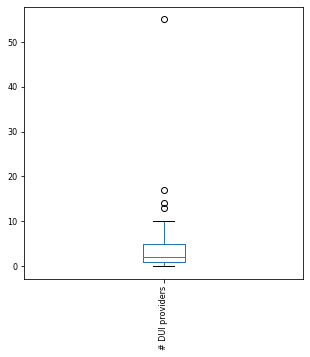

In [13]:
duiboxp = dui_providers_by_county.boxplot(figsize = (5,5), rot = 90, fontsize= '8', grid = False)

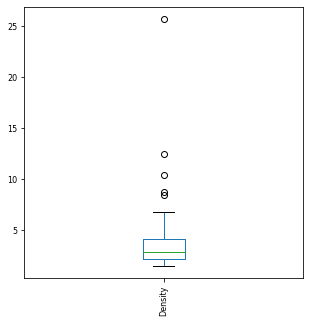

In [14]:
densityboxp = alcohol_store_density.boxplot(figsize = (5,5), rot = 90, fontsize= '8', grid = False)

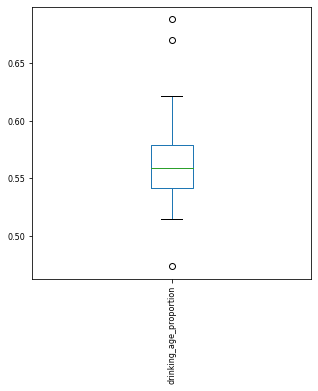

In [15]:
proportionbox = drinking_age_proportion.boxplot(figsize = (5,5), rot = 90, fontsize= '8', grid = False)

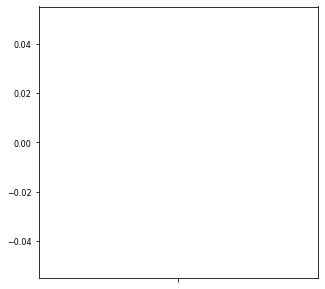

In [19]:
carcrashbox = alcohol_involved_crashes.boxplot(figsize = (5,5), rot = 90, fontsize= '8', grid = False, whis = 0.75, )

## Normality Test

In [12]:
drinking_age = df['drinking_age_proportion'].values
store_density = df['alcohol_store_density'].values
dui_providers = df['dui_providers_by_county'].values

st_da, p_da = stats.normaltest(drinking_age)
st_d, p_d = stats.normaltest(store_density)
st_dp, p_dp = stats.normaltest(dui_providers)
print(st_da, p_da, st_d, p_d, st_dp, p_dp)

19.12809000240516 7.020823113276415e-05 85.04653178402916 3.407063834809136e-19 102.11951987021871 6.683870285008056e-23


p values of three factors are less than 0.1.

## Correlation 